In [ ]:
import numpy as np
print(np.version.version)
from numpy import loadtxt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import glob
from numpy import diff
import pandas as pn
import math
import scipy.constants as sc
import pickle
import copy
from scipy import interpolate
from matplotlib import rcParams, cycler, cm, rc
plotall = True
overview_plot = True
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show,pcolor
import pandas as pd
import os
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from numpy.polynomial import Polynomial
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.font_manager as font_manager
import matplotlib.lines as mlines
from matplotlib.ticker import LogFormatterExponent
from num2tex import num2tex
import pynumdiff
import pynumdiff.optimize

In [ ]:
%run NNO_Functions_FM318.ipynb

In [ ]:
folder_RT_film_cleaned = r"C:\Users\pblah\Data\Navy Beach\FM318\Film\RT\Cleaned"
pathlist_RT_film_cleaned = folderpath(folder_RT_film_cleaned)

folder_RT_film_full_curve = r"C:\Users\pblah\Data\Navy Beach\FM318\Data\Film\RT\Full_Curve"
pathlist_RT_film_full_curve = folderpath_csv(folder_RT_film_full_curve)

folder_RT_Hall_Bar_1 = r"C:\Users\pblah\Data\Navy Beach\FM318\Hall Bar 1\RT"
pathlist_RT_Hall_Bar_1 = folderpath(folder_RT_Hall_Bar_1)

folder_RT_Hall_Bar_1_full_curve = r"C:\Users\pblah\Data\Navy Beach\FM318\Data\Hall Bar 1\RT\Full_Curve"
pathlist_RT_Hall_Bar_1_full_curve = folderpath_csv(folder_RT_Hall_Bar_1_full_curve)

folder_RT_film_separate = r"C:\Users\pblah\Data\Navy Beach\FM318\Data\Film\RT"
pathlist_RT_film_separate = folderpath_csv(folder_RT_film_separate)

folder_RT_Hall_Bar_1_separate = r"C:\Users\pblah\Data\Navy Beach\FM318\Data\Hall Bar 1"
pathlist_RT_Hall_Bar_1_separate = folderpath_csv(folder_RT_Hall_Bar_1_separate)

folder_RT_film_linear_fit_params = r"C:\Users\pblah\Data\Navy Beach\FM318\Data\Film\RT\Fitting Parameters\Linear Fit"
pathlist_RT_film_linear_fit_params = folderpath_csv(folder_RT_film_linear_fit_params)

folder_RT_membrane_linear_fit_params = r"C:\Users\pblah\Data\Navy Beach\FM318\Data\Hall Bar 1\RT\Fitting Parameters\Linear Fit"
pathlist_RT_membrane_linear_fit_params = folderpath_csv(folder_RT_membrane_linear_fit_params)




print(pathlist_RT_film_cleaned)
print(pathlist_RT_Hall_Bar_1)
print(pathlist_RT_film_full_curve)
print(pathlist_RT_Hall_Bar_1_full_curve)
print(pathlist_RT_film_separate)
print(pathlist_RT_Hall_Bar_1_separate)
print(pathlist_RT_film_linear_fit_params)
print(pathlist_RT_membrane_linear_fit_params)

### Extracting Linear Fit Params ###

In [ ]:
linear_extract_film = pd.read_csv(pathlist_RT_film_linear_fit_params[0])
a_film_linear = pd.DataFrame(linear_extract_film).at[0,'a']
b_film_linear = pd.DataFrame(linear_extract_film).at[0,'b']
linear_extract_membrane = pd.read_csv(pathlist_RT_membrane_linear_fit_params[0])
a_membrane_linear = pd.DataFrame(linear_extract_membrane).at[0,'a']
b_membrane_linear = pd.DataFrame(linear_extract_membrane).at[0,'b']
print('a_film_linear',a_film_linear)
print('b_film_linear',b_film_linear)
print('a_membrane_linear',a_membrane_linear)
print('b_membrane_linear',b_membrane_linear)

### Fitting Function ###

In [ ]:
def combo(T, A, B, C, D):
    y = A*np.exp(-B/(T**(1/4))) + C*np.exp(-D/(T))         
    return y

### Volume Fraction Function ###

In [ ]:
def vol_frac(G_e, g_m, g_s,D):
    V_s = (G_e - g_m)*(g_s + G_e*(D-1)) / (D*G_e*(g_s - g_m))  
    return V_s

### Conductance Functions ###

In [ ]:
def g_m(T,a,b):   
    g_m = a + b*T
    return g_m

def g_s(T,A,B,C,D):   
    g_s = A*np.exp(-B/(T**(1/4))) + C*np.exp(-D/(T)) 
    return g_s

## Semiconducting Region ##

0
1
0
1


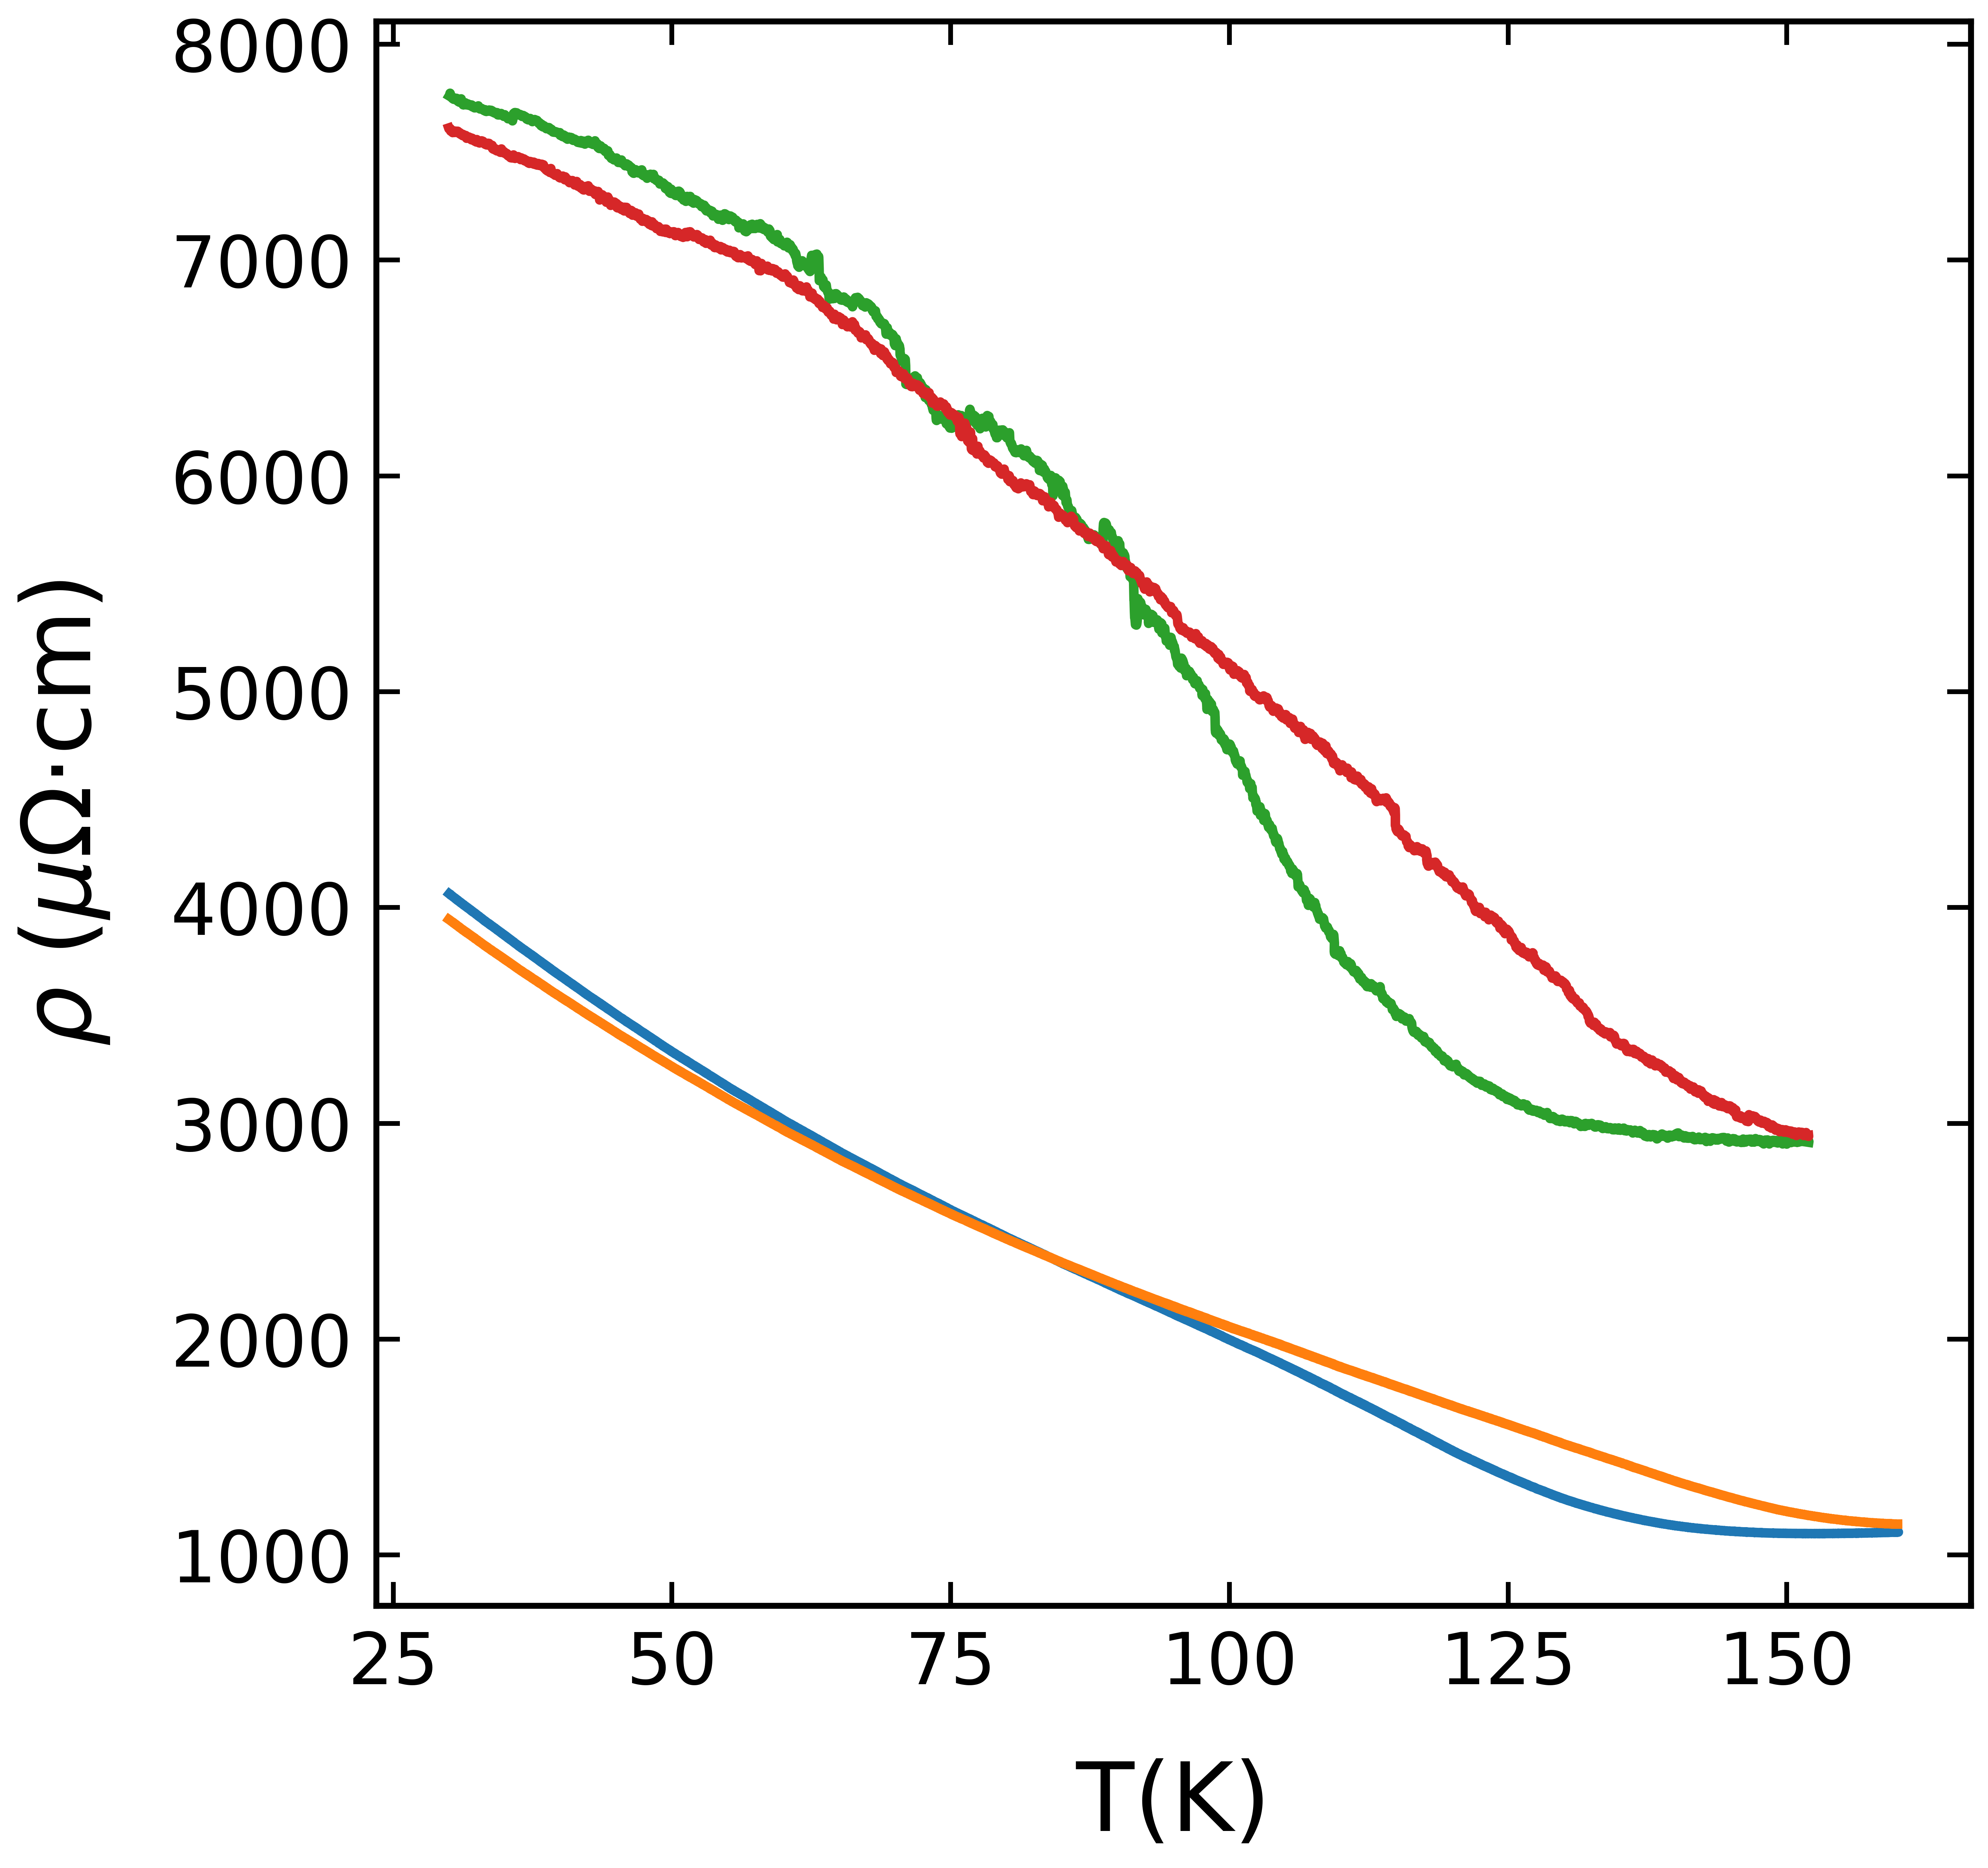

In [10]:
fig, ax = plt.subplots(figsize=(12, 12), dpi = 500)


labels = ['Film','Membrane']
#colours = ['dodgerblue','darkorange']
type = ['Cooldown','Warmup']

for i,data in enumerate(pathlist_RT_film_separate):
    
    print(i)
    
    x = pd.read_csv(data)
    temperature = pd.DataFrame(x).temperature.values.tolist()
    r4pt = pd.DataFrame(x).resitivity4pt.values.tolist()
    temperature = np.array(temperature)
    r4pt = np.array(r4pt)
    r4pt_inv = 1/r4pt
    #print(temperature)
    h = int(closest_element_index(temperature,160)[0])
    l = int(closest_element_index(temperature,30)[0])

    #print('High',h)
    #print('Low',l)
    
    if i == 0: # Cooldown
        temperature_insulating_region = temperature[h:l]
        temperature_inv_insulating_region = 1/temperature_insulating_region
        r4pt_insulating_region = r4pt[h:l]
        r4pt_inv_insulating_region = r4pt_inv[h:l]
        #print(len(temperature_insulating_region))
        
    if i == 1: # Warmup
        temperature_insulating_region = temperature[l:h]
        temperature_inv_insulating_region = 1/temperature_insulating_region
        r4pt_insulating_region = r4pt[l:h]
        r4pt_inv_insulating_region = r4pt_inv[l:h]
        #print(len(temperature_insulating_region))
        
    plt.plot(temperature_insulating_region, r4pt_insulating_region, lw = 4)    
    #plt.plot(temperature_inv_insulating_region, r4pt_inv_insulating_region, lw = 4)


for i,data in enumerate(pathlist_RT_Hall_Bar_1_separate):
    
    print(i)
    
    x = pd.read_csv(data)
    temperature = pd.DataFrame(x).temperature.values.tolist()
    r4pt = pd.DataFrame(x).resitivity4pt.values.tolist()
    temperature = np.array(temperature)
    temperature_inv = 1/temperature
    r4pt = np.array(r4pt)
    r4pt_inv = 1/r4pt
    h = int(closest_element_index(temperature,152)[0])
    l = int(closest_element_index(temperature,30)[0])

    #print('High',h)
    #print('Low',l)
    
    
    if i == 0: # Cooldown
        temperature_insulating_region = temperature[h:l]
        temperature_inv_insulating_region = 1/temperature_insulating_region
        r4pt_insulating_region = r4pt[h:l]
        r4pt_inv_insulating_region = r4pt_inv[h:l]
        #print(len(temperature_insulating_region))
        
    if i == 1: # Warmup
        temperature_insulating_region = temperature[l:h]
        temperature_inv_insulating_region = 1/temperature_insulating_region
        r4pt_insulating_region = r4pt[l:h]
        r4pt_inv_insulating_region = r4pt_inv[l:h]
        #print(len(temperature_insulating_region))
        

    plt.plot(temperature_insulating_region, r4pt_insulating_region, lw = 4)
    #plt.plot(temperature_inv_insulating_region, r4pt_inv_insulating_region, lw = 4)
    
    
ax.set_xlabel("T(K)",fontsize=40,labelpad = 25)
ax.set_ylabel(r'$\rho$ ($\mu$$\Omega$$\cdot$cm)',fontsize=40,labelpad = 25)
ax.tick_params(axis = 'x', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, top = True)
ax.tick_params(axis = 'y', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, right = True)
ax.tick_params(axis = 'y', which='minor', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, right = True)

ax.spines["top"].set_linewidth(2.5)
ax.spines["bottom"].set_linewidth(2.5)
ax.spines["right"].set_linewidth(2.5)
ax.spines["left"].set_linewidth(2.5)

blue_line = mlines.Line2D([], [],color='dodgerblue', lw=4, label = "Film",solid_capstyle='round')
orange_line = mlines.Line2D([], [],color='darkorange', lw=4, label = "Membrane",solid_capstyle='round')
black_line = mlines.Line2D([], [],color='black', lw=4, label = "Fit", ls = 'dashed')


#ax.legend(handles = [orange_line,blue_line],frameon = False,prop=font_manager.FontProperties(weight = 100, size = 32),borderpad=0.2,labelspacing=1,loc = 'center right',bbox_to_anchor=(0.13, 0.4, 0.85, 0.1), )


    
plt.show()    

## Inverse ##

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8), dpi = 100)


labels = ['Film','Membrane']
colours = ['darkorange','dodgerblue','red', 'purple', 'forestgreen', 'gold']
colours2 = ['deeppink','gray','gold', 'purple', 'purple', 'gold']
type = ['Cooldown','Warmup']

for i,data in enumerate(pathlist_RT_film_separate):
    
    #print(i)
    
    x = pd.read_csv(data)
    temperature = pd.DataFrame(x).temperature.values.tolist()
    r4pt = pd.DataFrame(x).resitivity4pt.values.tolist()
    temperature = np.array(temperature)
    r4pt = np.array(r4pt)
    r4pt_inv = 1/r4pt
    #print(temperature)
    h = int(closest_element_index(temperature,80)[0])
    l = int(closest_element_index(temperature,30)[0])

    #print('High',h)
    #print('Low',l)
    
    if i == 0: # Cooldown
        temperature_insulating_region = temperature[h:l]
        temperature_inv_insulating_region = 1/temperature_insulating_region
        r4pt_insulating_region = r4pt[h:l]
        r4pt_inv_insulating_region = r4pt_inv[h:l]
        #print(len(temperature_insulating_region))
        
    if i == 1: # Warmup
        temperature_insulating_region = temperature[l:h]
        temperature_inv_insulating_region = 1/temperature_insulating_region
        r4pt_insulating_region = r4pt[l:h]
        r4pt_inv_insulating_region = r4pt_inv[l:h]
        #print(len(temperature_insulating_region))
        
    #plt.plot(temperature_insulating_region, r4pt_insulating_region, lw = 4)    
    plt.plot(temperature_inv_insulating_region, r4pt_inv_insulating_region, lw = 4, color = colours[i])


for i,data in enumerate(pathlist_RT_Hall_Bar_1_separate):
    
    #print(i)
    
    x = pd.read_csv(data)
    temperature = pd.DataFrame(x).temperature.values.tolist()
    r4pt = pd.DataFrame(x).resitivity4pt.values.tolist()
    temperature = np.array(temperature)
    temperature_inv = 1/temperature
    r4pt = np.array(r4pt)
    r4pt_inv = 1/r4pt
    h = int(closest_element_index(temperature,80)[0])
    l = int(closest_element_index(temperature,30)[0])

    #print('High',h)
    #print('Low',l)
    
    
    if i == 0: # Cooldown
        temperature_insulating_region = temperature[h:l]
        temperature_inv_insulating_region = 1/temperature_insulating_region
        r4pt_insulating_region = r4pt[h:l]
        r4pt_inv_insulating_region = r4pt_inv[h:l]
        #print(len(temperature_insulating_region))
        
    if i == 1: # Warmup
        temperature_insulating_region = temperature[l:h]
        temperature_inv_insulating_region = 1/temperature_insulating_region
        r4pt_insulating_region = r4pt[l:h]
        r4pt_inv_insulating_region = r4pt_inv[l:h]
        #print(len(temperature_insulating_region))


    #plt.plot(temperature_insulating_region, r4pt_insulating_region, lw = 4)
    plt.plot(temperature_inv_insulating_region, r4pt_inv_insulating_region, lw = 4, color = colours2[i])
    
    
ax.set_xlabel(r'$ \frac{1}{T}$ ($K^{-1}$)',fontsize=40,labelpad = 25)
ax.set_ylabel(r'$ \frac{1}{\rho}$ ($\mu^{-1}$$\Omega^{-1}$⋅$cm^{-1}$)',fontsize=40,labelpad = 25)
ax.tick_params(axis = 'x', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, top = True)
ax.tick_params(axis = 'y', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, right = True)
ax.tick_params(axis = 'y', which='minor', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, right = True)

ax.spines["top"].set_linewidth(2.5)
ax.spines["bottom"].set_linewidth(2.5)
ax.spines["right"].set_linewidth(2.5)
ax.spines["left"].set_linewidth(2.5)

purple_line = mlines.Line2D([], [],color='purple', lw=4, label = "Membrane Warmup Fit",linestyle = 'dashed')
red_line = mlines.Line2D([], [],color='red', lw=4, label = "Film Cooldown Fit",linestyle = 'dashed')
gold_line = mlines.Line2D([], [],color='gold', lw=4, label = "Membrane Cooldown Fit",linestyle = 'dashed')
green_line = mlines.Line2D([], [],color='forestgreen', lw=4, label = "Film Warmup Fit",linestyle = 'dashed')
blue_line = mlines.Line2D([], [],color='dodgerblue', lw=4, label = "Film Warmup",solid_capstyle='round')
orange_line = mlines.Line2D([], [],color='darkorange', lw=4, label = "Film Cooldown",solid_capstyle='round')
pink_line = mlines.Line2D([], [],color='deeppink', lw=4, label = "Membrane Cooldown",solid_capstyle='round')
gray_line = mlines.Line2D([], [],color='black', lw=4, label = "Membrane Warmup",solid_capstyle='round')


ax.legend(handles = [orange_line,blue_line,pink_line, gray_line],frameon = False,prop=font_manager.FontProperties(weight = 100, size = 22),borderpad=0.2,labelspacing=1,loc = 'center right',bbox_to_anchor=(0.13, 0.4, 0.85, 0.85), )


    
plt.show()   

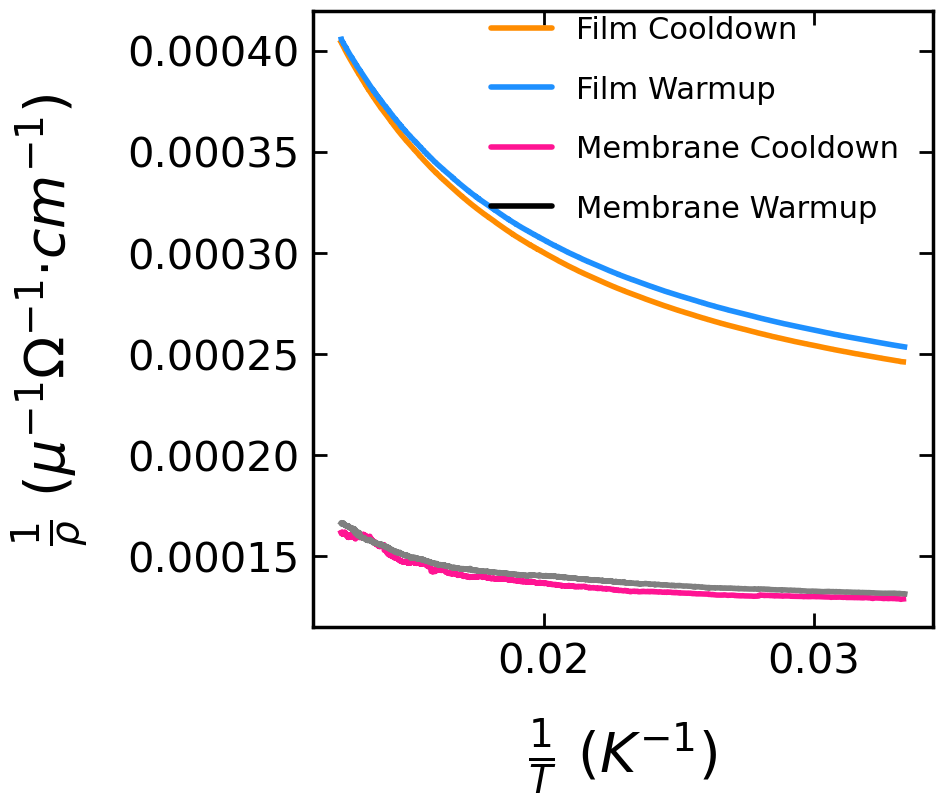

In [11]:
fig, ax = plt.subplots(figsize=(8, 8), dpi = 100)


labels = ['Film','Membrane']
colours = ['darkorange','dodgerblue','red', 'purple', 'forestgreen', 'gold']
colours2 = ['deeppink','gray','gold', 'purple', 'purple', 'gold']
type = ['Cooldown','Warmup']

for i,data in enumerate(pathlist_RT_film_separate):
    
    #print(i)
    
    x = pd.read_csv(data)
    temperature = pd.DataFrame(x).temperature.values.tolist()
    r4pt = pd.DataFrame(x).resitivity4pt.values.tolist()
    temperature = np.array(temperature)
    r4pt = np.array(r4pt)
    r4pt_inv = 1/r4pt
    #print(temperature)
    h = int(closest_element_index(temperature,80)[0])
    l = int(closest_element_index(temperature,30)[0])

    #print('High',h)
    #print('Low',l)
    
    if i == 0: # Cooldown
        temperature_insulating_region = temperature[h:l]
        temperature_inv_insulating_region = 1/temperature_insulating_region
        r4pt_insulating_region = r4pt[h:l]
        r4pt_inv_insulating_region = r4pt_inv[h:l]
        #print(len(temperature_insulating_region))
        
    if i == 1: # Warmup
        temperature_insulating_region = temperature[l:h]
        temperature_inv_insulating_region = 1/temperature_insulating_region
        r4pt_insulating_region = r4pt[l:h]
        r4pt_inv_insulating_region = r4pt_inv[l:h]
        #print(len(temperature_insulating_region))
        
    #plt.plot(temperature_insulating_region, r4pt_insulating_region, lw = 4)    
    plt.plot(temperature_inv_insulating_region, r4pt_inv_insulating_region, lw = 4, color = colours[i])


for i,data in enumerate(pathlist_RT_Hall_Bar_1_separate):
    
    #print(i)
    
    x = pd.read_csv(data)
    temperature = pd.DataFrame(x).temperature.values.tolist()
    r4pt = pd.DataFrame(x).resitivity4pt.values.tolist()
    temperature = np.array(temperature)
    temperature_inv = 1/temperature
    r4pt = np.array(r4pt)
    r4pt_inv = 1/r4pt
    h = int(closest_element_index(temperature,80)[0])
    l = int(closest_element_index(temperature,30)[0])

    #print('High',h)
    #print('Low',l)
    
    
    if i == 0: # Cooldown
        temperature_insulating_region = temperature[h:l]
        temperature_inv_insulating_region = 1/temperature_insulating_region
        r4pt_insulating_region = r4pt[h:l]
        r4pt_inv_insulating_region = r4pt_inv[h:l]
        #print(len(temperature_insulating_region))
        
    if i == 1: # Warmup
        temperature_insulating_region = temperature[l:h]
        temperature_inv_insulating_region = 1/temperature_insulating_region
        r4pt_insulating_region = r4pt[l:h]
        r4pt_inv_insulating_region = r4pt_inv[l:h]
        #print(len(temperature_insulating_region))


    #plt.plot(temperature_insulating_region, r4pt_insulating_region, lw = 4)
    plt.plot(temperature_inv_insulating_region, r4pt_inv_insulating_region, lw = 4, color = colours2[i])
    
    
ax.set_xlabel(r'$ \frac{1}{T}$ ($K^{-1}$)',fontsize=40,labelpad = 25)
ax.set_ylabel(r'$ \frac{1}{\rho}$ ($\mu^{-1}$$\Omega^{-1}$⋅$cm^{-1}$)',fontsize=40,labelpad = 25)
ax.tick_params(axis = 'x', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, top = True)
ax.tick_params(axis = 'y', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, right = True)
ax.tick_params(axis = 'y', which='minor', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, right = True)

ax.spines["top"].set_linewidth(2.5)
ax.spines["bottom"].set_linewidth(2.5)
ax.spines["right"].set_linewidth(2.5)
ax.spines["left"].set_linewidth(2.5)

purple_line = mlines.Line2D([], [],color='purple', lw=4, label = "Membrane Warmup Fit",linestyle = 'dashed')
red_line = mlines.Line2D([], [],color='red', lw=4, label = "Film Cooldown Fit",linestyle = 'dashed')
gold_line = mlines.Line2D([], [],color='gold', lw=4, label = "Membrane Cooldown Fit",linestyle = 'dashed')
green_line = mlines.Line2D([], [],color='forestgreen', lw=4, label = "Film Warmup Fit",linestyle = 'dashed')
blue_line = mlines.Line2D([], [],color='dodgerblue', lw=4, label = "Film Warmup",solid_capstyle='round')
orange_line = mlines.Line2D([], [],color='darkorange', lw=4, label = "Film Cooldown",solid_capstyle='round')
pink_line = mlines.Line2D([], [],color='deeppink', lw=4, label = "Membrane Cooldown",solid_capstyle='round')
gray_line = mlines.Line2D([], [],color='black', lw=4, label = "Membrane Warmup",solid_capstyle='round')


ax.legend(handles = [orange_line,blue_line,pink_line, gray_line],frameon = False,prop=font_manager.FontProperties(weight = 100, size = 22),borderpad=0.2,labelspacing=1,loc = 'center right',bbox_to_anchor=(0.13, 0.4, 0.85, 0.85), )


    
plt.show()    

### Fitting Inverse ###

C:\Users\pblah\Data\Navy Beach\FM318\Data\Film\RT\ 0_FM318_Film_RvsT_cooldown.csv
[79.993 79.973 79.931 ... 30.073 30.053 30.021]
A,B,C,D 1.9370324761579435e-07 -2.151817694085455 0.00018377204131511963 -0.005406526112332359
C:\Users\pblah\Data\Navy Beach\FM318\Data\Film\RT\ 1_FM318_Film_RvsT_warmup.csv
[79.959 79.946 79.926 ... 30.023 30.005 29.982]
A,B,C,D 4.2449002007589285e-05 -0.7479904958658801 1.0 17652333.24554145
C:\Users\pblah\Data\Navy Beach\FM318\Data\Hall Bar 1\RT 0_FM318 Hall Bar 1 RvsT.csv


C:\Users\pblah\AppData\Local\Temp\ipykernel_17156\805273429.py:2: RuntimeWarning: overflow encountered in exp
  y = A*np.exp(-B/(T**(1/4))) + C*np.exp(-D/(T))
C:\ProgramData\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


A,B,C,D 2.8464427999265986e-10 -3.975383476019984 0.0001283015810586991 0.0005485002219128269
C:\Users\pblah\Data\Navy Beach\FM318\Data\Hall Bar 1\RT 1_FM318 Hall Bar 1 RvsT.csv
A,B,C,D 3.0129554913395312e-18 -9.809423275402256 0.00012117866571664174 -0.002747505621051265
parameters_dict {}
[0.00070631 0.00070639 0.00070637 ... 0.00013198 0.00013198 0.00013198]


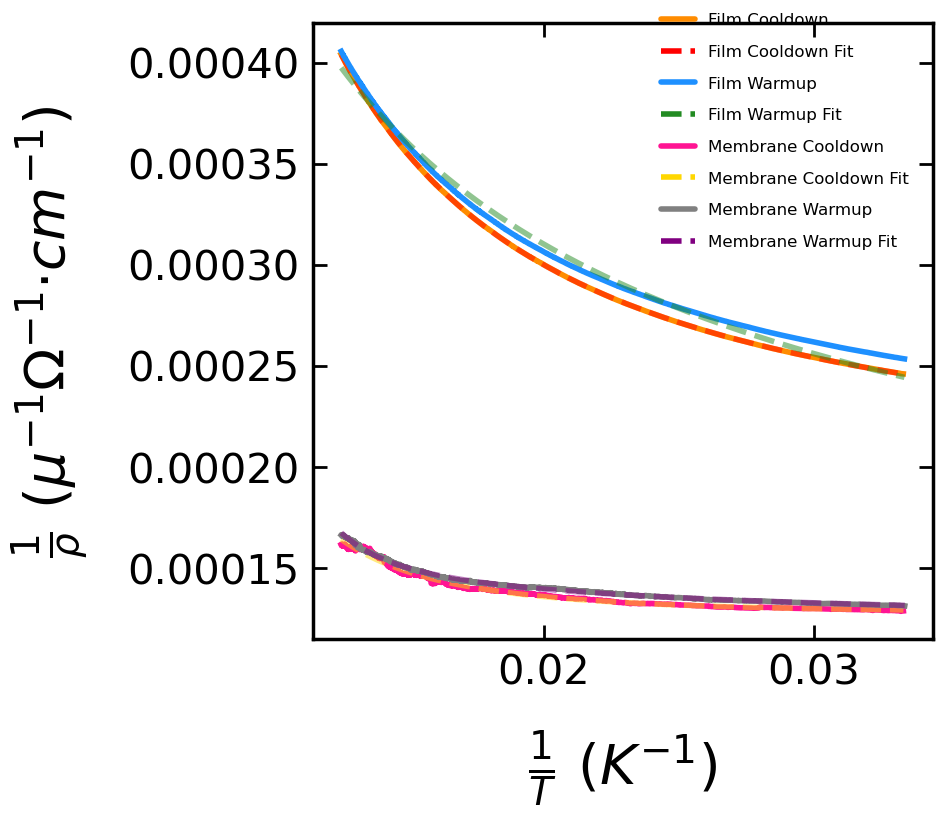

In [12]:
# Doing Both as 'Cooldowns"


fig, ax = plt.subplots(figsize=(8, 8), dpi = 100)


labels = ['Film','Membrane']
colours = ['darkorange','dodgerblue','red', 'purple', 'forestgreen', 'gold']
colours2 = ['deeppink','gray','gold', 'purple', 'purple', 'gold']
types_film = ['Film_Cooldown','Film_Warmup']
types_membrane = ['Membrane_Cooldown','Membrane_Warmup']
parameters_dict = {}
G_e_film_cooldown = []
G_e_film_warmup = []
G_e_membrane_cooldown = []
G_e_membrane_warmup = []

################################################################# FILM #################################################################################



for i,data in enumerate(pathlist_RT_film_separate):
    
    print(data)
    
    x = pd.read_csv(data)
    temperature = pd.DataFrame(x).temperature.values.tolist()
    r4pt = pd.DataFrame(x).resitivity4pt.values.tolist()
    temperature = np.array(temperature)
    r4pt = np.array(r4pt)
    r4pt_inv = 1/r4pt
    #print(temperature)
    h = int(closest_element_index(temperature,80)[0])
    l = int(closest_element_index(temperature,30)[0])

    #print('High',h)
    #print('Low',l)
    
    if i == 0: # Cooldown
        temperature_insulating_region = temperature[h:l]
        temperature_inv_insulating_region = 1/temperature_insulating_region
        print(temperature_insulating_region)
        r4pt_insulating_region = r4pt[h:l]
        r4pt_inv_insulating_region = r4pt_inv[h:l]
        G_e_film_cooldown = np.append(G_e_film_cooldown,r4pt_inv)
        #print(len(temperature_insulating_region))
        
    if i == 1: # Warmup
        temperature_insulating_region = temperature[l:h]
        temperature_insulating_region = temperature_insulating_region[::-1]
        print(temperature_insulating_region)
        temperature_inv_insulating_region = 1/temperature_insulating_region
        r4pt_insulating_region = r4pt[l:h]
        r4pt_insulating_region = r4pt_insulating_region[::-1]
        r4pt_inv_insulating_region = r4pt_inv[l:h]
        r4pt_inv_insulating_region = r4pt_inv_insulating_region[::-1]
        G_e_film_warmup = np.append(G_e_film_warmup,r4pt_inv)
        #print(len(temperature_insulating_region))
        
    parameters, covariance = curve_fit(combo, temperature_inv_insulating_region, r4pt_inv_insulating_region,maxfev=5000)
    fit_A = parameters[0]
    fit_B = parameters[1]
    fit_C = parameters[2]
    fit_D = parameters[3]
    print("A,B,C,D",fit_A,fit_B,fit_C,fit_D)
    fit_y = combo(temperature_inv_insulating_region, fit_A, fit_B, fit_C, fit_D)
    
    plt.plot(temperature_inv_insulating_region, r4pt_inv_insulating_region, lw = 4, color = colours[i])
    plt.plot(temperature_inv_insulating_region, fit_y, lw = 4, color = colours[(i+1)*2], linestyle = "--", alpha = 0.5)
    
    #parameters_dict['fit' + '_' + 'A' + '_' +  types_film[i]] = fit_A
    #parameters_dict['fit' + '_' + 'B' + '_' +  types_film[i]] = fit_B
    #parameters_dict['fit' + '_' + 'C' + '_' +  types_film[i]] = fit_C
    #parameters_dict['fit' + '_' + 'D' + '_' +  types_film[i]] = fit_D 


    
################################################################# Membrane #################################################################################    
    
    
for i,data in enumerate(pathlist_RT_Hall_Bar_1_separate):
    
    print(data)
    
    x = pd.read_csv(data)
    temperature = pd.DataFrame(x).temperature.values.tolist()
    r4pt = pd.DataFrame(x).resitivity4pt.values.tolist()
    temperature = np.array(temperature)
    temperature_inv = 1/temperature
    r4pt = np.array(r4pt)
    r4pt_inv = 1/r4pt
    h = int(closest_element_index(temperature,80)[0])
    l = int(closest_element_index(temperature,30)[0])

    #print('High',h)
    #print('Low',l)
    
    
    if i == 0: # Cooldown
        temperature_insulating_region = temperature[h:l]
        temperature_inv_insulating_region = 1/temperature_insulating_region
        r4pt_insulating_region = r4pt[h:l]
        r4pt_inv_insulating_region = r4pt_inv[h:l]
        G_e_membrane_cooldown = np.append(G_e_membrane_cooldown,r4pt_inv)
        #print(len(temperature_insulating_region))
        
    if i == 1: # Warmup
        temperature_insulating_region = temperature[l:h]
        temperature_insulating_region = temperature_insulating_region[::-1]
        #print(temperature_insulating_region)
        temperature_inv_insulating_region = 1/temperature_insulating_region
        r4pt_insulating_region = r4pt[l:h]
        r4pt_insulating_region = r4pt_insulating_region[::-1]
        r4pt_inv_insulating_region = r4pt_inv[l:h]
        r4pt_inv_insulating_region = r4pt_inv_insulating_region[::-1]
        G_e_membrane_warmup = np.append(G_e_membrane_warmup,r4pt_inv)
        #print(len(temperature_insulating_region))
        
    parameters, covariance = curve_fit(combo, temperature_inv_insulating_region, r4pt_inv_insulating_region,maxfev=5000)
    fit_A = parameters[0]
    fit_B = parameters[1]
    fit_C = parameters[2]
    fit_D = parameters[3]
    print("A,B,C,D",fit_A,fit_B,fit_C,fit_D)
    fit_y = combo(temperature_inv_insulating_region, fit_A, fit_B, fit_C, fit_D)
    
    plt.plot(temperature_inv_insulating_region, r4pt_inv_insulating_region, lw = 4, color = colours2[i])
    plt.plot(temperature_inv_insulating_region, fit_y, lw = 4, color = colours2[(i+1)*2], linestyle = "--", alpha = 0.5)
    
    #parameters_dict['fit' + '_' + 'A' + '_' +  types_membrane[i]] = fit_A
    #parameters_dict['fit' + '_' + 'B' + '_' +  types_membrane[i]] = fit_B
    #parameters_dict['fit' + '_' + 'C' + '_' +  types_membrane[i]] = fit_C
    #parameters_dict['fit' + '_' + 'D' + '_' +  types_membrane[i]] = fit_D


    #plt.plot(temperature_insulating_region, r4pt_insulating_region, lw = 4)
    #plt.plot(temperature_inv_insulating_region, r4pt_inv_insulating_region, lw = 4)
    

print('parameters_dict',parameters_dict)
print(G_e_film_cooldown)
################################################################# Plotting #################################################################################    
    
    
    
ax.set_xlabel(r'$ \frac{1}{T}$ ($K^{-1}$)',fontsize=40,labelpad = 25)
ax.set_ylabel(r'$ \frac{1}{\rho}$ ($\mu^{-1}$$\Omega^{-1}$⋅$cm^{-1}$)',fontsize=40,labelpad = 25)
ax.tick_params(axis = 'x', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, top = True)
ax.tick_params(axis = 'y', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, right = True)
ax.tick_params(axis = 'y', which='minor', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, right = True)

ax.spines["top"].set_linewidth(2.5)
ax.spines["bottom"].set_linewidth(2.5)
ax.spines["right"].set_linewidth(2.5)
ax.spines["left"].set_linewidth(2.5)

purple_line = mlines.Line2D([], [],color='purple', lw=4, label = "Membrane Warmup Fit",linestyle = 'dashed')
red_line = mlines.Line2D([], [],color='red', lw=4, label = "Film Cooldown Fit",linestyle = 'dashed')
gold_line = mlines.Line2D([], [],color='gold', lw=4, label = "Membrane Cooldown Fit",linestyle = 'dashed')
green_line = mlines.Line2D([], [],color='forestgreen', lw=4, label = "Film Warmup Fit",linestyle = 'dashed')
blue_line = mlines.Line2D([], [],color='dodgerblue', lw=4, label = "Film Warmup",solid_capstyle='round')
orange_line = mlines.Line2D([], [],color='darkorange', lw=4, label = "Film Cooldown",solid_capstyle='round')
pink_line = mlines.Line2D([], [],color='deeppink', lw=4, label = "Membrane Cooldown",solid_capstyle='round')
gray_line = mlines.Line2D([], [],color='gray', lw=4, label = "Membrane Warmup",solid_capstyle='round')


ax.legend(handles = [orange_line, red_line, blue_line, green_line,pink_line, gold_line, gray_line, purple_line],frameon = False,prop=font_manager.FontProperties(weight = 100, size = 12),borderpad=0.2,labelspacing=1,loc = 'center right',bbox_to_anchor=(0.13, 0.4, 0.85, 0.85), )


    
plt.show()    

### Conductivity vs Temp of Semiconducting region ###

C:\Users\pblah\Data\Navy Beach\FM318\Data\Film\RT\ 0_FM318_Film_RvsT_cooldown.csv
[79.993 79.973 79.931 ... 30.073 30.053 30.021]
A,B,C,D -1.538907943569017 -0.0036536344231076104 1.5409616360029164 -0.01174449401531362
C:\Users\pblah\Data\Navy Beach\FM318\Data\Film\RT\ 1_FM318_Film_RvsT_warmup.csv
[79.959 79.946 79.926 ... 30.023 30.005 29.982]
A,B,C,D -1.2953464761262672 -0.004068929101932828 1.2973011805904537 -0.012920236294267041
C:\Users\pblah\Data\Navy Beach\FM318\Data\Hall Bar 1\RT 0_FM318 Hall Bar 1 RvsT.csv
A,B,C,D -0.45798431572760145 -0.003989960571467098 0.45867146461674213 -0.014854000299642399
C:\Users\pblah\Data\Navy Beach\FM318\Data\Hall Bar 1\RT 1_FM318 Hall Bar 1 RvsT.csv
A,B,C,D -0.45117009337375324 -0.003503243714739781 0.4517892589583044 -0.012715532966186606
parameters_dict {'fit_A_Film_Cooldown': -1.538907943569017, 'fit_B_Film_Cooldown': -0.0036536344231076104, 'fit_C_Film_Cooldown': 1.5409616360029164, 'fit_D_Film_Cooldown': -0.01174449401531362, 'fit_A_Film_W

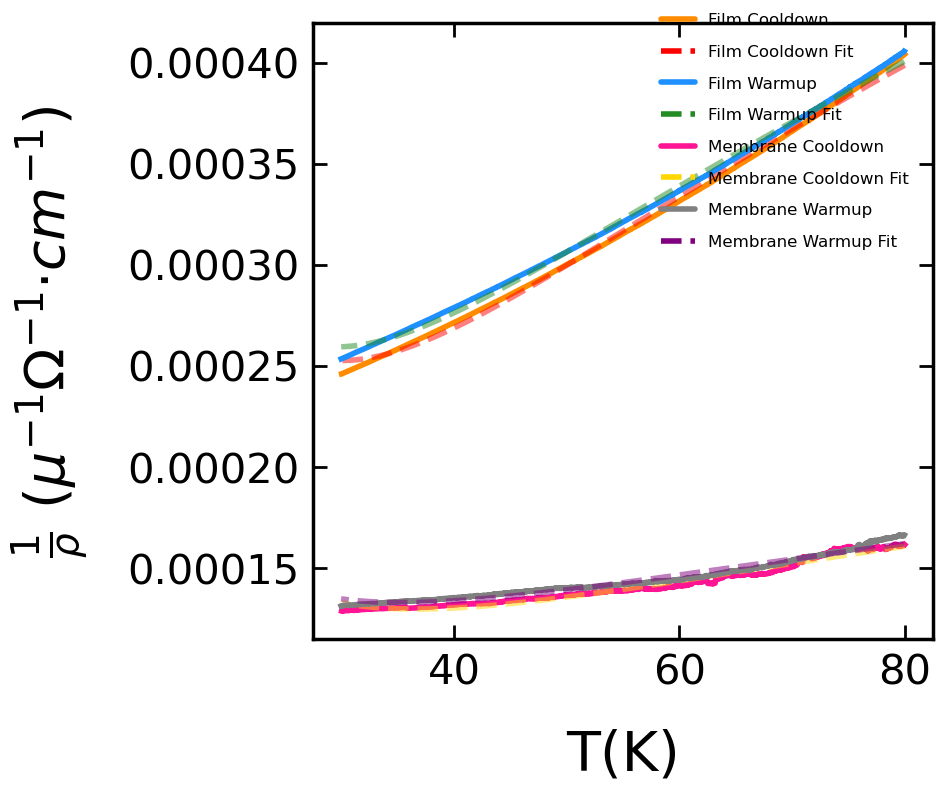

In [13]:
# Doing Both as 'Cooldowns"


fig, ax = plt.subplots(figsize=(8, 8), dpi = 100)


labels = ['Film','Membrane']
colours = ['darkorange','dodgerblue','red', 'purple', 'forestgreen', 'gold']
colours2 = ['deeppink','gray','gold', 'purple', 'purple', 'gold']
types_film = ['Film_Cooldown','Film_Warmup']
types_membrane = ['Membrane_Cooldown','Membrane_Warmup']
parameters_dict = {}
G_e_film_cooldown = []
G_e_film_warmup = []
G_e_membrane_cooldown = []
G_e_membrane_warmup = []

################################################################# FILM #################################################################################



for i,data in enumerate(pathlist_RT_film_separate):
    
    print(data)
    
    x = pd.read_csv(data)
    temperature = pd.DataFrame(x).temperature.values.tolist()
    r4pt = pd.DataFrame(x).resitivity4pt.values.tolist()
    temperature = np.array(temperature)
    r4pt = np.array(r4pt)
    r4pt_inv = 1/r4pt
    #print(temperature)
    h = int(closest_element_index(temperature,80)[0])
    l = int(closest_element_index(temperature,30)[0])

    #print('High',h)
    #print('Low',l)
    
    if i == 0: # Cooldown
        temperature_insulating_region = temperature[h:l]
        temperature_inv_insulating_region = 1/temperature_insulating_region
        print(temperature_insulating_region)
        r4pt_insulating_region = r4pt[h:l]
        r4pt_inv_insulating_region = r4pt_inv[h:l]
        G_e_film_cooldown = np.append(G_e_film_cooldown,r4pt_inv)
        #print(len(temperature_insulating_region))
        
    if i == 1: # Warmup
        temperature_insulating_region = temperature[l:h]
        temperature_insulating_region = temperature_insulating_region[::-1]
        print(temperature_insulating_region)
        temperature_inv_insulating_region = 1/temperature_insulating_region
        r4pt_insulating_region = r4pt[l:h]
        r4pt_insulating_region = r4pt_insulating_region[::-1]
        r4pt_inv_insulating_region = r4pt_inv[l:h]
        r4pt_inv_insulating_region = r4pt_inv_insulating_region[::-1]
        G_e_film_warmup = np.append(G_e_film_warmup,r4pt_inv)
        #print(len(temperature_insulating_region))
        
    parameters, covariance = curve_fit(combo, temperature_insulating_region, r4pt_inv_insulating_region,maxfev=50000)
    fit_A = parameters[0]
    fit_B = parameters[1]
    fit_C = parameters[2]
    fit_D = parameters[3]
    print("A,B,C,D",fit_A,fit_B,fit_C,fit_D)
    fit_y = combo(temperature_insulating_region, fit_A, fit_B, fit_C, fit_D)
    
    plt.plot(temperature_insulating_region, r4pt_inv_insulating_region, lw = 4, color = colours[i])
    plt.plot(temperature_insulating_region, fit_y, lw = 4, color = colours[(i+1)*2], linestyle = "--", alpha = 0.5)
    
    parameters_dict['fit' + '_' + 'A' + '_' +  types_film[i]] = fit_A
    parameters_dict['fit' + '_' + 'B' + '_' +  types_film[i]] = fit_B
    parameters_dict['fit' + '_' + 'C' + '_' +  types_film[i]] = fit_C
    parameters_dict['fit' + '_' + 'D' + '_' +  types_film[i]] = fit_D 


    
################################################################# Membrane #################################################################################    
    
    
for i,data in enumerate(pathlist_RT_Hall_Bar_1_separate):
    
    print(data)
    
    x = pd.read_csv(data)
    temperature = pd.DataFrame(x).temperature.values.tolist()
    r4pt = pd.DataFrame(x).resitivity4pt.values.tolist()
    temperature = np.array(temperature)
    temperature_inv = 1/temperature
    r4pt = np.array(r4pt)
    r4pt_inv = 1/r4pt
    h = int(closest_element_index(temperature,80)[0])
    l = int(closest_element_index(temperature,30)[0])

    #print('High',h)
    #print('Low',l)
    
    
    if i == 0: # Cooldown
        temperature_insulating_region = temperature[h:l]
        temperature_inv_insulating_region = 1/temperature_insulating_region
        r4pt_insulating_region = r4pt[h:l]
        r4pt_inv_insulating_region = r4pt_inv[h:l]
        G_e_membrane_cooldown = np.append(G_e_membrane_cooldown,r4pt_inv)
        #print(len(temperature_insulating_region))
        
    if i == 1: # Warmup
        temperature_insulating_region = temperature[l:h]
        temperature_insulating_region = temperature_insulating_region[::-1]
        #print(temperature_insulating_region)
        temperature_inv_insulating_region = 1/temperature_insulating_region
        r4pt_insulating_region = r4pt[l:h]
        r4pt_insulating_region = r4pt_insulating_region[::-1]
        r4pt_inv_insulating_region = r4pt_inv[l:h]
        r4pt_inv_insulating_region = r4pt_inv_insulating_region[::-1]
        G_e_membrane_warmup = np.append(G_e_membrane_warmup,r4pt_inv)
        #print(len(temperature_insulating_region))
        
    parameters, covariance = curve_fit(combo, temperature_insulating_region, r4pt_inv_insulating_region,maxfev=50000)
    fit_A = parameters[0]
    fit_B = parameters[1]
    fit_C = parameters[2]
    fit_D = parameters[3]
    print("A,B,C,D",fit_A,fit_B,fit_C,fit_D)
    fit_y = combo(temperature_insulating_region, fit_A, fit_B, fit_C, fit_D)
    
    plt.plot(temperature_insulating_region, r4pt_inv_insulating_region, lw = 4, color = colours2[i])
    plt.plot(temperature_insulating_region, fit_y, lw = 4, color = colours2[(i+1)*2], linestyle = "--", alpha = 0.5)
    
    parameters_dict['fit' + '_' + 'A' + '_' +  types_membrane[i]] = fit_A
    parameters_dict['fit' + '_' + 'B' + '_' +  types_membrane[i]] = fit_B
    parameters_dict['fit' + '_' + 'C' + '_' +  types_membrane[i]] = fit_C
    parameters_dict['fit' + '_' + 'D' + '_' +  types_membrane[i]] = fit_D


    #plt.plot(temperature_insulating_region, r4pt_insulating_region, lw = 4)
    #plt.plot(temperature_inv_insulating_region, r4pt_inv_insulating_region, lw = 4)
    

print('parameters_dict',parameters_dict)
print(G_e_film_cooldown)
################################################################# Plotting #################################################################################    
    
    
    
ax.set_xlabel(r'T(K)',fontsize=40,labelpad = 25)
ax.set_ylabel(r'$ \frac{1}{\rho}$ ($\mu^{-1}$$\Omega^{-1}$⋅$cm^{-1}$)',fontsize=40,labelpad = 25)
ax.tick_params(axis = 'x', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, top = True)
ax.tick_params(axis = 'y', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, right = True)
ax.tick_params(axis = 'y', which='minor', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, right = True)

ax.spines["top"].set_linewidth(2.5)
ax.spines["bottom"].set_linewidth(2.5)
ax.spines["right"].set_linewidth(2.5)
ax.spines["left"].set_linewidth(2.5)

purple_line = mlines.Line2D([], [],color='purple', lw=4, label = "Membrane Warmup Fit",linestyle = 'dashed')
red_line = mlines.Line2D([], [],color='red', lw=4, label = "Film Cooldown Fit",linestyle = 'dashed')
gold_line = mlines.Line2D([], [],color='gold', lw=4, label = "Membrane Cooldown Fit",linestyle = 'dashed')
green_line = mlines.Line2D([], [],color='forestgreen', lw=4, label = "Film Warmup Fit",linestyle = 'dashed')
blue_line = mlines.Line2D([], [],color='dodgerblue', lw=4, label = "Film Warmup",solid_capstyle='round')
orange_line = mlines.Line2D([], [],color='darkorange', lw=4, label = "Film Cooldown",solid_capstyle='round')
pink_line = mlines.Line2D([], [],color='deeppink', lw=4, label = "Membrane Cooldown",solid_capstyle='round')
gray_line = mlines.Line2D([], [],color='gray', lw=4, label = "Membrane Warmup",solid_capstyle='round')


ax.legend(handles = [orange_line, red_line, blue_line, green_line,pink_line, gold_line, gray_line, purple_line],frameon = False,prop=font_manager.FontProperties(weight = 100, size = 12),borderpad=0.2,labelspacing=1,loc = 'center right',bbox_to_anchor=(0.13, 0.4, 0.85, 0.85), )


    
plt.show()    

### Defining appropiate temperatures for volume fraction calculation ###

In [ ]:
t_film_cooldown = []
t_film_warmup = []
t_membrane_cooldown = []
t_membrane_warmup = []



for i,data in enumerate(pathlist_RT_film_separate):
    
    print(data)
    
    x = pd.read_csv(data)
    temperature = pd.DataFrame(x).temperature.values.tolist()
    temperature = np.array(temperature)
    
    if i ==0:
        t_film_cooldown = np.append(t_film_cooldown,temperature)
        
    if i ==1:
        t_film_warmup = np.append(t_film_warmup,temperature) 
    
    
for i,data in enumerate(pathlist_RT_Hall_Bar_1_separate):
    
    print(data)
    
    x = pd.read_csv(data)
    temperature = pd.DataFrame(x).temperature.values.tolist()
    temperature = np.array(temperature)
    
    if i ==0:
        t_membrane_cooldown = np.append(t_membrane_cooldown,temperature)
        
    if i ==1:
        t_membrane_warmup = np.append(t_membrane_warmup,temperature) 
        
        
print('t_film_cooldown',t_film_cooldown)
print('t_film_warmup',t_film_warmup)
print('t_membrane_cooldown',t_membrane_cooldown)
print('t_membrane_warmup',t_membrane_warmup)

# Calculating Volume Fraction #

## Parameters ##

parameters_dict {'fit_A_Film_Cooldown': -1.538907943569017, 'fit_B_Film_Cooldown': -0.0036536344231076104, 'fit_C_Film_Cooldown': 1.5409616360029164, 'fit_D_Film_Cooldown': -0.01174449401531362, 'fit_A_Film_Warmup': -1.2953464761262672, 'fit_B_Film_Warmup': -0.004068929101932828, 'fit_C_Film_Warmup': 1.2973011805904537, 'fit_D_Film_Warmup': -0.012920236294267041, 'fit_A_Membrane_Cooldown': -0.45798431572760145, 'fit_B_Membrane_Cooldown': -0.003989960571467098, 'fit_C_Membrane_Cooldown': 0.45867146461674213, 'fit_D_Membrane_Cooldown': -0.014854000299642399, 'fit_A_Membrane_Warmup': -0.45117009337375324, 'fit_B_Membrane_Warmup': -0.003503243714739781, 'fit_C_Membrane_Warmup': 0.4517892589583044, 'fit_D_Membrane_Warmup': -0.012715532966186606}
G_e_film_cooldown [0.00070631 0.00070639 0.00070637 ... 0.00013198 0.00013198 0.00013198]
G_e_film_warmup [0.00013286 0.00013287 0.00013286 ... 0.00070321 0.00070324 0.00070304]
G_e_membrane_cooldown [0.00028825 0.00028612 0.00028731 ... 0.0001076  

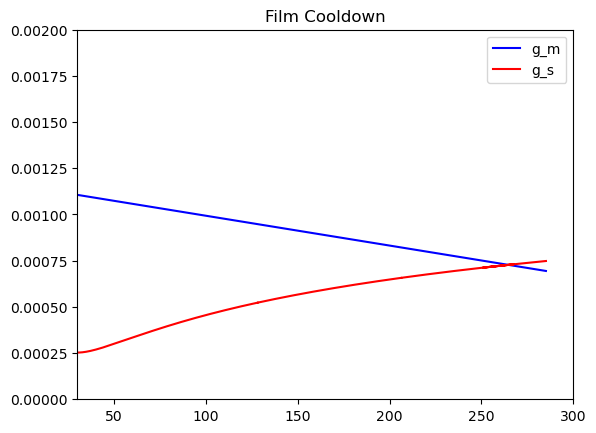

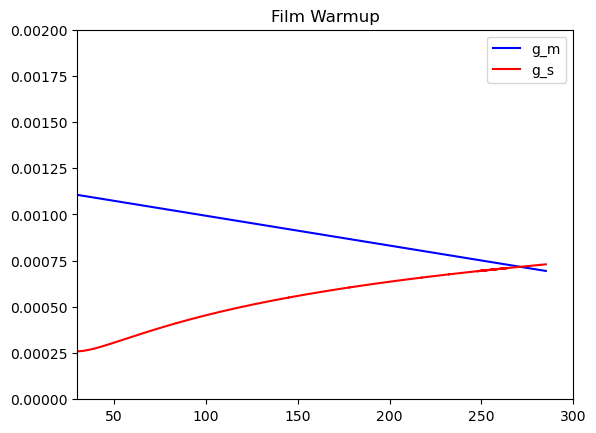

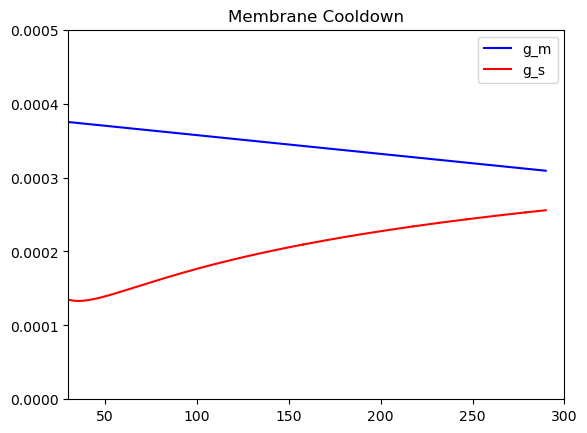

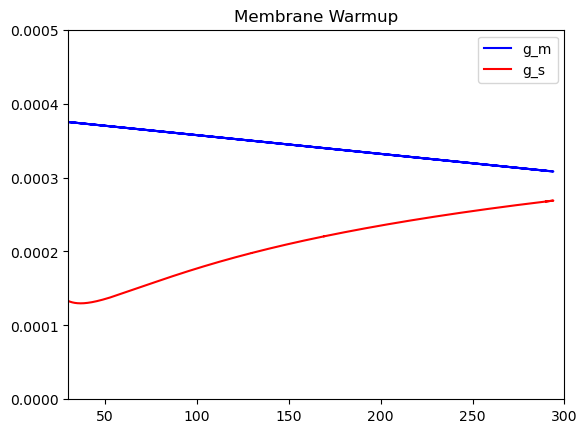

In [15]:
print('parameters_dict',parameters_dict)

G_e_film_cooldown = G_e_film_cooldown
G_e_film_warmup = G_e_film_warmup
G_e_membrane_cooldown = G_e_membrane_cooldown
G_e_membrane_warmup = G_e_membrane_warmup

g_m_film_cooldown = g_m(t_film_cooldown, a_film_linear, b_film_linear)
g_m_film_warmup = g_m(t_film_warmup, a_film_linear, b_film_linear)
g_s_film_cooldown = g_s(t_film_cooldown, parameters_dict['fit_A_Film_Cooldown'], parameters_dict['fit_B_Film_Cooldown'],parameters_dict['fit_C_Film_Cooldown'],parameters_dict['fit_D_Film_Cooldown'])
g_s_film_warmup = g_s(t_film_warmup, parameters_dict['fit_A_Film_Warmup'],parameters_dict['fit_B_Film_Warmup'],parameters_dict['fit_C_Film_Warmup'],parameters_dict['fit_D_Film_Warmup'])

g_m_membrane_cooldown = g_m(t_membrane_cooldown, a_membrane_linear, b_membrane_linear)
g_m_membrane_warmup = g_m(t_membrane_warmup, a_membrane_linear, b_membrane_linear)
g_s_membrane_cooldown = g_s(t_membrane_cooldown, parameters_dict['fit_A_Membrane_Cooldown'], parameters_dict['fit_B_Membrane_Cooldown'],parameters_dict['fit_C_Membrane_Cooldown'],parameters_dict['fit_D_Membrane_Cooldown'])
g_s_membrane_warmup = g_s(t_membrane_warmup, parameters_dict['fit_A_Membrane_Warmup'],parameters_dict['fit_B_Membrane_Warmup'],parameters_dict['fit_C_Membrane_Warmup'],parameters_dict['fit_D_Membrane_Warmup'])

print('G_e_film_cooldown',G_e_film_cooldown)
print('G_e_film_warmup',G_e_film_warmup)
print('G_e_membrane_cooldown',G_e_membrane_cooldown)
print('G_e_membrane_warmup',G_e_membrane_warmup)

print('g_m_film_cooldown',g_m_film_cooldown)
print('g_m_film_warmup',g_m_film_warmup)
print('g_s_film_cooldown',g_s_film_cooldown)
print('g_s_film_warmup',g_s_film_warmup)

print('g_m_membrane_cooldown',g_m_membrane_cooldown)
print('g_m_membrane_warmup',g_m_membrane_warmup)
print('g_s_membrane_cooldown',g_s_membrane_cooldown)
print('g_s_membrane_warmup',g_s_membrane_warmup)



##### Plotting Params to debug ####

labels = ['g_m','g_s']

plt.title('Film Cooldown')
plt.plot(t_film_cooldown,g_m_film_cooldown, color = 'b')
plt.plot(t_film_cooldown,g_s_film_cooldown, color = 'r')
plt.legend(labels)
plt.xlim(30,300)
plt.ylim(0,0.002)
plt.show()
    

plt.title('Film Warmup')
plt.plot(t_film_warmup,g_m_film_warmup, color = 'b')
plt.plot(t_film_warmup,g_s_film_warmup, color = 'r')
plt.legend(labels)
plt.xlim(30,300)
plt.ylim(0,0.002)
plt.show()
    

plt.title('Membrane Cooldown')
plt.xlim(30,300)
plt.ylim(0,0.0005)
plt.plot(t_membrane_warmup,g_m_membrane_warmup, color = 'b')
plt.plot(t_membrane_warmup,g_s_membrane_warmup, color = 'r')
plt.legend(labels)
plt.show()
    
    
plt.title('Membrane Warmup')
plt.xlim(30,300)
plt.ylim(0,0.0005)
plt.plot(t_membrane_cooldown,g_m_membrane_cooldown, color = 'b')
plt.plot(t_membrane_cooldown,g_s_membrane_cooldown, color = 'r')
plt.legend(labels)
plt.show()


### Volume Fraction ###

In [ ]:
vol_frac_film_cooldown = vol_frac(G_e_film_cooldown,g_m_film_cooldown,g_s_film_cooldown,3)
vol_frac_film_warmup = vol_frac(G_e_film_warmup,g_m_film_warmup,g_s_film_warmup,3)
vol_frac_membrane_cooldown = vol_frac(G_e_membrane_cooldown,g_m_membrane_cooldown,g_s_membrane_cooldown,3)
vol_frac_membrane_warmup = vol_frac(G_e_membrane_warmup,g_m_membrane_warmup,g_s_membrane_warmup,3)

labels = ['film cooldown','film warmup', 'membrane cooldown', 'membrane warmup']


plt.plot( t_film_cooldown, vol_frac_film_cooldown, color = 'r')
plt.plot( t_film_warmup, vol_frac_film_warmup, color = 'b')
plt.plot( t_membrane_cooldown, vol_frac_membrane_cooldown, color = 'g')
plt.plot( t_membrane_warmup, vol_frac_membrane_warmup, color = 'purple')
plt.hlines(0.6,0,150)
plt.legend(labels)
plt.xlim(40,250)
plt.ylim(0,1.2)
plt.show()

### -dLn(rho) / dT ###

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 12), sharey = True, dpi = 500)

import numpy.ma as ma

test = -np.gradient(np.log(1/G_e_film_warmup))/np.gradient(t_film_warmup)

test_m = ma.masked_invalid(test)

labels = ['film cooldown','film warmup', 'membrane cooldown', 'membrane warmup']


plt.scatter(t_film_cooldown,-np.gradient(np.log(1/G_e_film_cooldown))/np.gradient(t_film_cooldown))
plt.scatter(t_film_warmup,-np.gradient(np.log(1/G_e_film_warmup))/np.gradient(t_film_warmup))
#plt.stairs(t_film_warmup,test_m)
#plt.scatter(t_membrane_cooldown,-np.gradient(np.log(1/G_e_membrane_cooldown))/np.gradient(t_membrane_cooldown))
#plt.scatter(t_membrane_warmup,-np.gradient(np.log(G_e_membrane_warmup)/np.gradient(t_membrane_warmup)))

         
plt.xlim(40,250)
plt.ylim(0,0.6)


#plt.hlines(0.6,0,150)
plt.legend(labels)
plt.show()

In [ ]:
def closest_element(array,value):
    element = min(array, key=lambda x:abs(x-value))
    closest_element = np.where(array == element)[0][0]
    return closest_element

### V_s & dRho/dT vs T ###

len_Ln_Rho[i] 2375
temp_ranges[i] 2375
t_step 0.1194532434709351
t_step 0.1200336842105263
2375 der_length
cut 1900
t_peak 780
temp_ranges[i][t_peak] 118.89
t_peak dxdt 0.3845270365767206
baseline 1116
39.952
len_Ln_Rho[i] 1365
temp_ranges[i] 1365
t_step 0.21148093841642226
t_step 0.2152234432234432
1365 der_length
cut 1092
t_peak 942
temp_ranges[i][t_peak] 103.76
t_peak dxdt 0.4552293213150982
baseline 1221
40.107


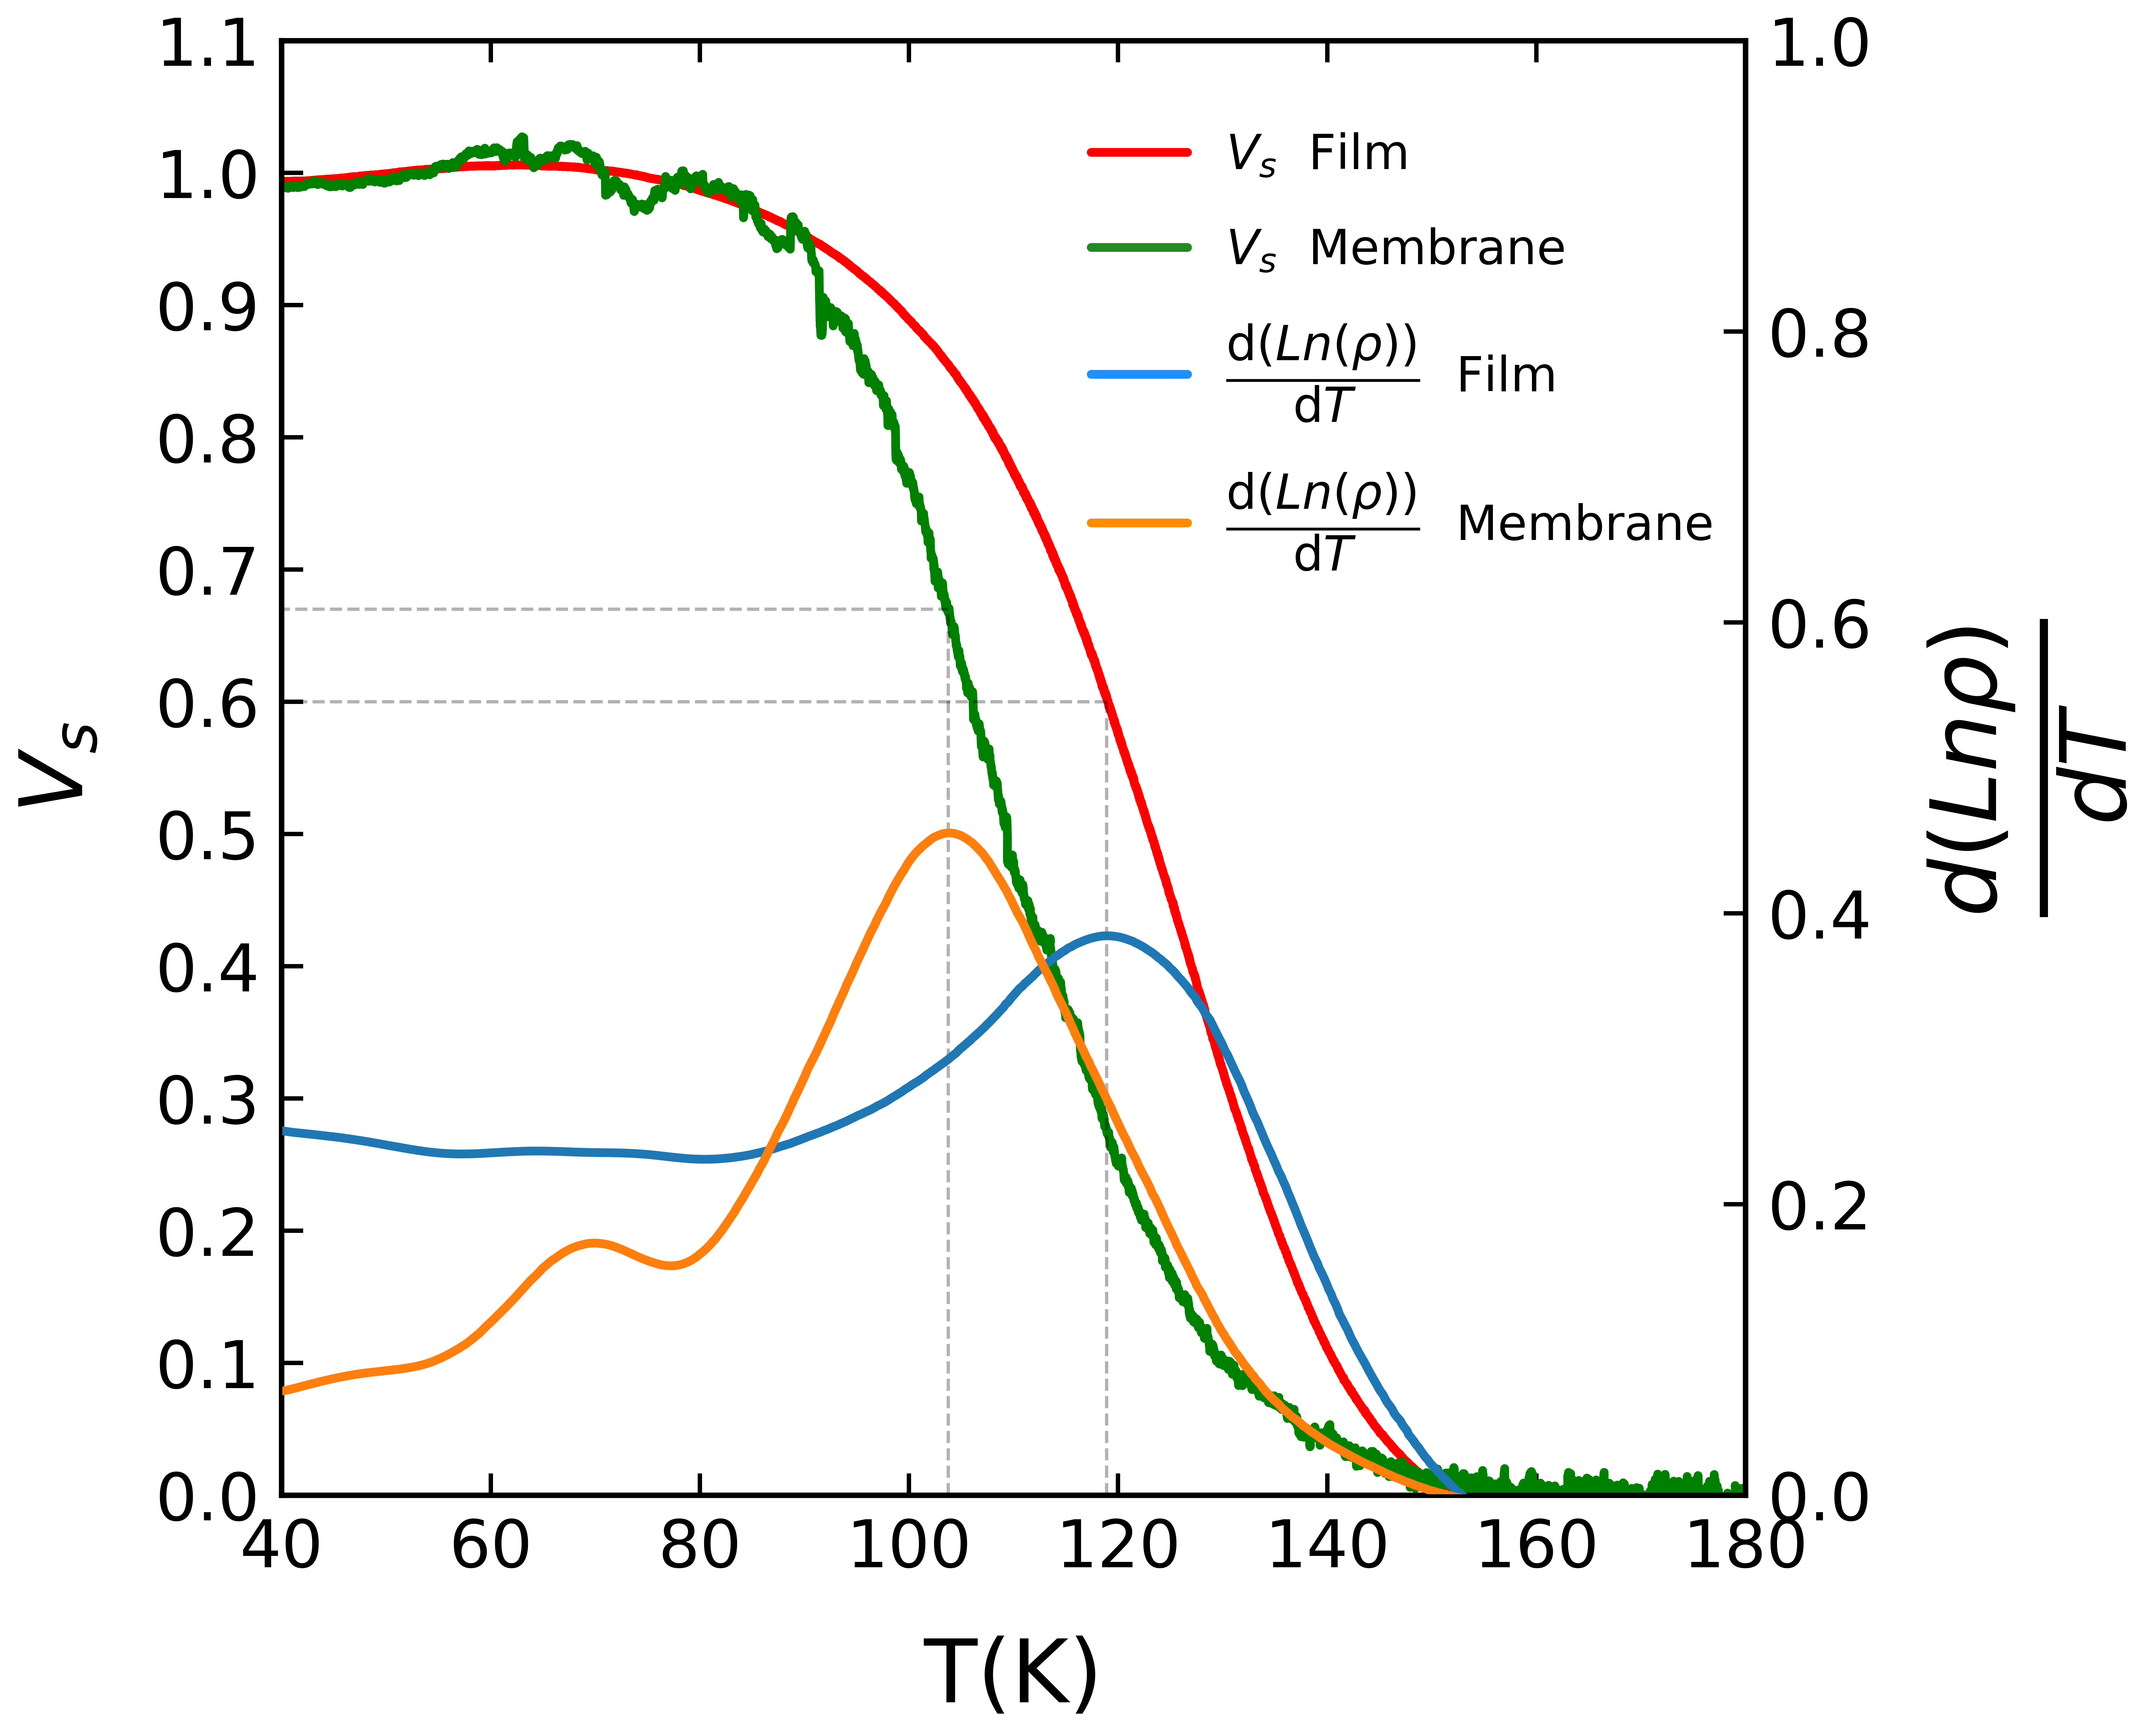

In [48]:
fig, ax1 = plt.subplots(figsize=(12,12), sharey = True, dpi = 500)
simulate = pynumdiff.utils.simulate
evaluate = pynumdiff.utils.evaluate

Ln_Rho = [np.log((1/G_e_film_cooldown)),np.log((1/G_e_film_warmup)),np.log((1/G_e_membrane_cooldown)),np.log((1/G_e_membrane_warmup))]
temp_ranges = [t_film_cooldown,t_film_warmup,t_membrane_cooldown,t_membrane_warmup]


labels = ['film cooldown','film warmup','membrane cooldown','membrane warmup']
labels1 = ['film cooldown','membrane cooldown']
colours_vline = ['blue','orange']
y_ticks = np.arange(0,1.2,0.1)
#print(Ln_Rho)


#cutoff_frequency = 3 # high frequency of signal in the data. 
# estimate by (a) counting real # peaks per second in the data or (b) look at power spectra and choose cutoff. 
#log_gamma = -1.6*np.log(cutoff_frequency) -0.71*np.log(dt) - 5.1
#tvgamma = np.exp(log_gamma)

ax2 = ax1.twinx()

plt.xlim(40,180)
ax1.set_ylim(0,1.1)
ax1.set_yticks(y_ticks)

#ax1.hlines(0.68,0,103.2, color = 'black', alpha = 0.3)
#ax1.hlines(0.6,0,119.2, color = 'black', alpha = 0.3)
#ax1.hlines(0.7,0,170, color = 'blue')
ax1.plot( t_film_cooldown, vol_frac_film_cooldown, color = 'r',lw = 4)
#ax1.plot( t_film_warmup, vol_frac_film_warmup, color = 'b')
ax1.plot( t_membrane_cooldown, vol_frac_membrane_cooldown, color = 'g',lw = 4)
#ax1.plot( t_membrane_warmup, vol_frac_membrane_warmup, color = 'purple')



tvgamma = 10
num = 10



for i in range(0,3,2):
    
    step_array = []
    
    Ln_Rho[i] = Ln_Rho[i][0::num]
    temp_ranges[i] = temp_ranges[i][0::num]
    
    
    print('len_Ln_Rho[i]',len(Ln_Rho[i]))
    print('temp_ranges[i]',len(temp_ranges[i]))
    
    for ii, data in enumerate(temp_ranges[i]):
        
        if ii < len(temp_ranges[i])-1:
            step = temp_ranges[i][ii]-temp_ranges[i][ii+1]
            step_array = np.append(step,step_array)
            
    #print('step_array',step_array)  
    
    #print(sum(step_array)/len(step_array))
    
    t_step = sum(step_array)/len(step_array)
    #print(step_array)
    print("t_step",t_step)
    
    t_step = np.max(temp_ranges[i]/len(temp_ranges[i]))
    print("t_step",t_step)
        
    
    #print('Ln_Rho',Ln_Rho[i])
    #print('temp_ranges',temp_ranges[i])
    
    
    #plt.plot(temp_ranges[i],Ln_Rho[i])
    #plt.show()
    

    
    ########### Finite Diff 1st Order ###############
    
    #params, val = pynumdiff.optimize.finite_difference.first_order(Ln_Rho[i], 0.01, params=None, 
    #                                                           options={'iterate': True},
    #                                                           tvgamma=tvgamma,
    #                                                           dxdt_truth=None)

    
    #x_hat, dxdt_hat = pynumdiff.finite_difference.first_order(Ln_Rho[i], 0.01, params, options={'iterate': True})
    
    
    ############################# Finite Diff 2nd Order ###########################

    
    #x_hat, dxdt_hat = pynumdiff.finite_difference.second_order(Ln_Rho[i], 0.01)
    
    
    ############################# Smooth Finite Difference: Mean smoothing ###########################
    
    params, val = pynumdiff.optimize.smooth_finite_difference.meandiff(Ln_Rho[i], 0.01, params=None, 
                                                                   options={'iterate': True},
                                                                   tvgamma=tvgamma,
                                                                   dxdt_truth=None)
 
    x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.meandiff(Ln_Rho[i],0.01, params, options={'iterate': True})
    
     
    
    
    ############################# Iterative Total Variation Regularization (regularized velocity) ###########################
    
    
    
    
    
    #params, val = pynumdiff.optimize.smooth_finite_difference.gaussiandiff(Ln_Rho[i], 0.01, params=None, 
    #                                                                       options={'iterate': True},
    #                                                                       tvgamma=tvgamma,
    #                                                                       dxdt_truth=None)

    #x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.gaussiandiff(Ln_Rho[i], 0.01, params, options={'iterate': True})
    
    
    ############################# Smooth Finite Difference: Gaussian smoothing ###########################
    
    
    
    
    
    #params, val = pynumdiff.optimize.total_variation_regularization.iterative_velocity(Ln_Rho[i], 0.01, params=None,
    #                                                                       tvgamma=tvgamma,
    #                                                                       dxdt_truth=None)

    #x_hat, dxdt_hat = pynumdiff.total_variation_regularization.iterative_velocity(Ln_Rho[i], 0.01, params)
    
    
    ############################# Linear Models: Savitzky-Golay filter ###########################
    
    
    
    
    
    #params, val = pynumdiff.optimize.linear_model.savgoldiff(Ln_Rho[i], 0.01, params=None,
    #                                                                       tvgamma=tvgamma,
    #                                                                       dxdt_truth=None)

    #x_hat, dxdt_hat = pynumdiff.linear_model.savgoldiff(Ln_Rho[i], 0.01, params)
    
    der_length = len(dxdt_hat)
    
    print(der_length,'der_length')
    cut = int(der_length*0.8)
    
    print('cut',cut)


    ### Plotting Params ###
    
    h = int(closest_element_index(temp_ranges[i],150)[0])
    l = int(closest_element_index(temp_ranges[i],80)[0])

    #print('len(dxdt_hat)',len(dxdt_hat))
    if i == 0:
        t_peak = np.where(dxdt_hat == np.max(dxdt_hat[h:l]))[0][0]
        
    if i == 2:
        t_peak = np.where(dxdt_hat== np.max(dxdt_hat[h:l]))[0][0]
    
    print('t_peak',t_peak)
    print('temp_ranges[i][t_peak]',temp_ranges[i][t_peak])
    
    print('t_peak dxdt', dxdt_hat[t_peak])

    
    if i == 0:
        ax1.vlines(temp_ranges[i][t_peak],0,0.6, color = 'black', linestyle = "--", alpha = 0.3)
        ax1.hlines(0.6,0,temp_ranges[i][t_peak], color = 'black', linestyle = "--",  alpha = 0.3)
        
        
    if i == 2:
        ax1.vlines(temp_ranges[i][t_peak],0,0.67, color = 'black', linestyle = "--", alpha = 0.3)
        ax1.hlines(0.67,0,temp_ranges[i][t_peak], color = 'black', linestyle = "--",  alpha = 0.3)
    
    
    baseline = closest_element(temp_ranges[i],40)
    
    
    
    print('baseline',baseline)
    
    print(temp_ranges[i][baseline])
        
    
    ax2.set_ylim(0,1)
    #ax2.plot(temp_ranges[i],dxdt_hat-dxdt_hat[baseline], lw = 3)
    ax2.plot(temp_ranges[i],dxdt_hat, lw = 4)

#ax2.vlines(106,0,0.12, color = 'black', alpha = 0.3)



ax1.set_xlabel("T(K)",fontsize=40,labelpad = 25)
ax1.set_ylabel(r'$V_{s}$',fontsize=40,labelpad = 25)
ax2.set_ylabel(r'$\frac{d(Ln\rho)}{dT}$',fontsize=60,labelpad = 25)
ax1.tick_params(axis = 'x', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, top = True)
ax1.tick_params(axis = 'y', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, right = False)
ax1.tick_params(axis = 'y', which='minor', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, right = False)
ax2.tick_params(axis = 'y', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, right = True)
#ax2.tick_params(axis = 'y', which='minor', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, right = True)


ax1.spines["top"].set_linewidth(2.5)
ax1.spines["bottom"].set_linewidth(2.5)
ax1.spines["right"].set_linewidth(2.5)
ax1.spines["left"].set_linewidth(2.5)

purple_line = mlines.Line2D([], [],color='purple', lw=4, label = "40 u.c*",solid_capstyle='round')
red_line = mlines.Line2D([], [],color='red', lw=4, label = r'$V_{s}$  Film',solid_capstyle='round')
gold_line = mlines.Line2D([], [],color='gold', lw=4, label = "6 u.c*",solid_capstyle='round')
green_line = mlines.Line2D([], [],color='forestgreen', lw=4, label = r'$V_{s}$  Membrane',solid_capstyle='round')
blue_line = mlines.Line2D([], [],color='dodgerblue', lw=4, label = r'$\mathregular{\dfrac{d(\mathit{Ln(\rho)})}{d\mathit{T}}}$  Film',solid_capstyle='round')
orange_line = mlines.Line2D([], [],color='darkorange', lw=4, label = r'$\mathregular{\dfrac{d(\mathit{Ln(\rho)})}{d\mathit{T}}}$  Membrane',solid_capstyle='round')

ax1.legend(handles = [red_line,green_line,blue_line,orange_line],frameon = False,prop=font_manager.FontProperties(weight = 100, size = 22),borderpad=0.2,labelspacing=1,loc = 'upper right',bbox_to_anchor=(0.15, 0.15, 0.85, 0.81), )
                                                   
plt.savefig(r"C:\Users\pblah\Data\Navy Beach\FM318\Figures\FM318_RT_Vs_vs_T_twin_axis_gamma10.pdf",bbox_inches = "tight", format = "pdf")  
plt.savefig(r"C:\Users\pblah\Data\Navy Beach\FM318\Figures\FM318_RT_Vs_vs_Te_twin_axis_gamma10.png",bbox_inches = "tight")  